In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [8]:
data = np.array(pd.read_csv("ex2data1.txt",sep=",",header=None))

In [9]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);


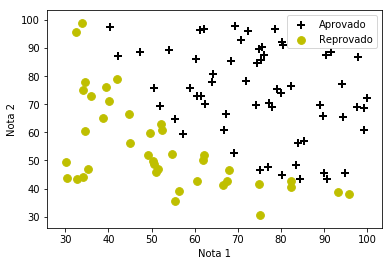

In [42]:
pt = plt.figure()
plotData(data,"Nota 1","Nota 2","Aprovado","Reprovado",pt.gca())

In [44]:
pt.savefig("curso.png")

In [22]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [14]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [15]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [16]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [45]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

data = np.array(pd.read_csv("ex2data1.txt",sep=",",header=None))

X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})



Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


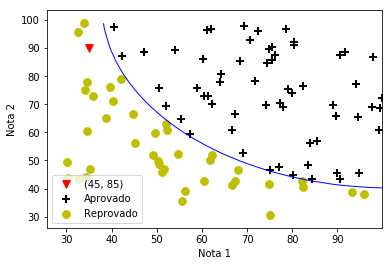

In [53]:
plt.scatter(35, 90, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, "Nota 1","Nota 2","Aprovado","Reprovado")
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx2.ravel()**2].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');
plt.savefig("quad.png")

array([[30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ],
       [30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ],
       [30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ],
       ...,
       [30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ],
       [30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ],
       [30.05882245, 31.48268031, 32.90653818, ..., 96.98014207,
        98.40399993, 99.8278578 ]])

In [52]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2], data[:,0:2]**2 ]
y = np.c_[data[:,2]]
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})


Cost: 
 0.6931471805599453
Grad: 
 [-1.00000000e-01 -1.20092166e+01 -1.12628422e+01 -1.13895134e+03
 -1.06939408e+03]


/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/ronaldoprati/anaconda3/lib/p

In [54]:
data = np.array(pd.read_csv("ex2data2.txt",sep=",",header=None))

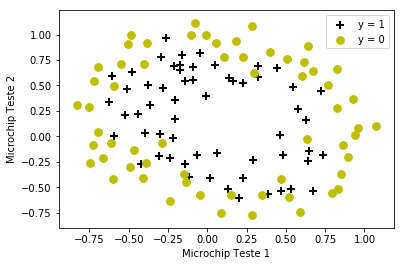

In [55]:
pt = plt.figure()
plotData(data,'Microchip Teste 1', 'Microchip Teste 2', 'y = 1', 'y = 0',pt.gca())
pt.savefig("microchip.png")

In [56]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

NameError: name 'PolynomialFeatures' is not defined